# LightGBM booster classifier - Extended Version V1

This version of the model uses all the features present from the EMG recolected signals, this increases complexity of the model as well the dimensionality of data. For now it´s just for showing the main training of the lgbm model and how good it is capable to perform.
The next version will be a reduced version in which datapoints of input vectors should be less than 1000.

### Classification of vowels from EMG signals

#### Loading data

In [1]:
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

# load data
all_data_dir = "./training_data"
with open(f'{all_data_dir}/train.npy', 'rb') as f:
    X = np.load(f, allow_pickle=True)
    Y = np.load(f, allow_pickle=True)

X_train, X_test, y_train, y_test = train_test_split(normalize(X), Y, test_size=0.3, random_state=42)

print(f"Training data: {X_train.shape}, {y_train.shape}")
print(f"Testing data: {X_test.shape}, {y_test.shape}")

Training data: (105, 5600), (105,)
Testing data: (45, 5600), (45,)


#### Encoding labels

In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

#### Defining model configurations & training

In [9]:
import lightgbm as lgb

lgb_train = lgb.Dataset(X_train, y_train_encoded)
lgb_test = lgb.Dataset(X_test, y_test_encoded)

params = {
    'task': 'train'
    ,'boosting_type': 'gbdt'
    ,'objective': 'multiclass'
    ,'num_class': 5
    ,'metric': 'multi_logloss'
    }

gbm = lgb.train(params, lgb_train, num_boost_round=150, valid_sets=[lgb_test])
gbm.save_model("models/vowel_clf_v1.txt")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031712 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192354
[LightGBM] [Info] Number of data points in the train set: 105, number of used features: 5600
[LightGBM] [Info] Start training from score -1.820747
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.658228
[LightGBM] [Info] Start training from score -1.395864
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

#### Performance evaluation & Results

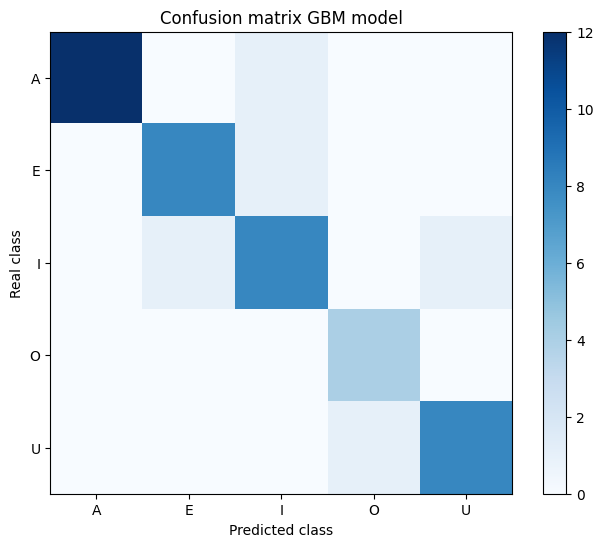

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.89      0.89      0.89         9
           2       0.80      0.80      0.80        10
           3       0.80      1.00      0.89         4
           4       0.89      0.89      0.89         9

    accuracy                           0.89        45
   macro avg       0.88      0.90      0.89        45
weighted avg       0.89      0.89      0.89        45



In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# load trained model
model = lgb.Booster(model_file="models/vowel_clf_v1.txt")

predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

y_test_encoded = label_encoder.transform(y_test)

vowels = ['A', 'E', 'I', 'O', 'U']
predicted_vowels = [vowels[i] for i in predicted_classes]
true_vowels = [vowels[i] for i in y_test_encoded]

# create confusion matrix
conf_matrix = confusion_matrix(true_vowels, predicted_vowels, labels=vowels)

# confusion matrix visualization
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix GBM model')
plt.colorbar()

plt.xticks(range(len(vowels)), vowels)
plt.yticks(range(len(vowels)), vowels)

plt.xlabel('Predicted class')
plt.ylabel('Real class')
plt.show()

# print classification report
print("Classification report:\n", classification_report(y_test_encoded, predicted_classes))